 # Detecting seasonality for each cluster of APMC

In [31]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from pandas import Series

In [32]:
df=pd.read_csv("C:\\Users\\vj0805\\Desktop\\Socialcops\\seasonal_data_analysis.csv")

In [33]:
df.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,quarter,identifier
0,Akole,bajri,2014,September,25,1467,1733,1650.0,2014-09-01,Ahmadnagar,Maharashtra,3,Akole_bajri
1,Akole,bajri,2014,October,30,1390,1700,1560.0,2014-10-01,Ahmadnagar,Maharashtra,4,Akole_bajri
2,Akole,bajri,2014,November,67,1400,1700,1550.0,2014-11-01,Ahmadnagar,Maharashtra,4,Akole_bajri
3,Akole,bajri,2014,December,40,1375,1750,1563.0,2014-12-01,Ahmadnagar,Maharashtra,4,Akole_bajri
4,Akole,bajri,2015,January,74,1395,1840,1580.0,2015-01-01,Ahmadnagar,Maharashtra,1,Akole_bajri


In [34]:
df.dtypes

APMC                object
Commodity           object
Year                 int64
Month               object
arrivals_in_qtl      int64
min_price            int64
max_price            int64
modal_price        float64
date                object
district_name       object
state_name          object
quarter              int64
identifier          object
dtype: object

In [35]:
data=df[df["APMC"]=='Telhara']

In [36]:
data=data[data["Commodity"]=="soybean"]
data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,quarter,identifier
2880,Telhara,soybean,2014,September,565,3102,3221,3150.0,2014-09-01,Akola,Maharashtra,3,Telhara_soybean
2881,Telhara,soybean,2014,October,2075,2780,2975,2903.0,2014-10-01,Akola,Maharashtra,4,Telhara_soybean
2882,Telhara,soybean,2014,November,8875,3062,3214,3140.0,2014-11-01,Akola,Maharashtra,4,Telhara_soybean
2883,Telhara,soybean,2014,December,3950,3084,3206,3138.0,2014-12-01,Akola,Maharashtra,4,Telhara_soybean
2884,Telhara,soybean,2015,January,2425,3094,3218,3140.0,2015-01-01,Akola,Maharashtra,1,Telhara_soybean


In [37]:
data=data[["APMC","Commodity","modal_price","date"]]

In [38]:
#converting date column to datetime and using it as as index to plot modal_price as a function of time
data["date"]=pd.to_datetime(data["date"])
data.set_index('date', inplace=True)

In [39]:
data.head()

,APMC,Commodity,modal_price
date,,,
2014-09-01,Telhara,soybean,3150.0
2014-10-01,Telhara,soybean,2903.0
2014-11-01,Telhara,soybean,3140.0
2014-12-01,Telhara,soybean,3138.0
2015-01-01,Telhara,soybean,3140.0


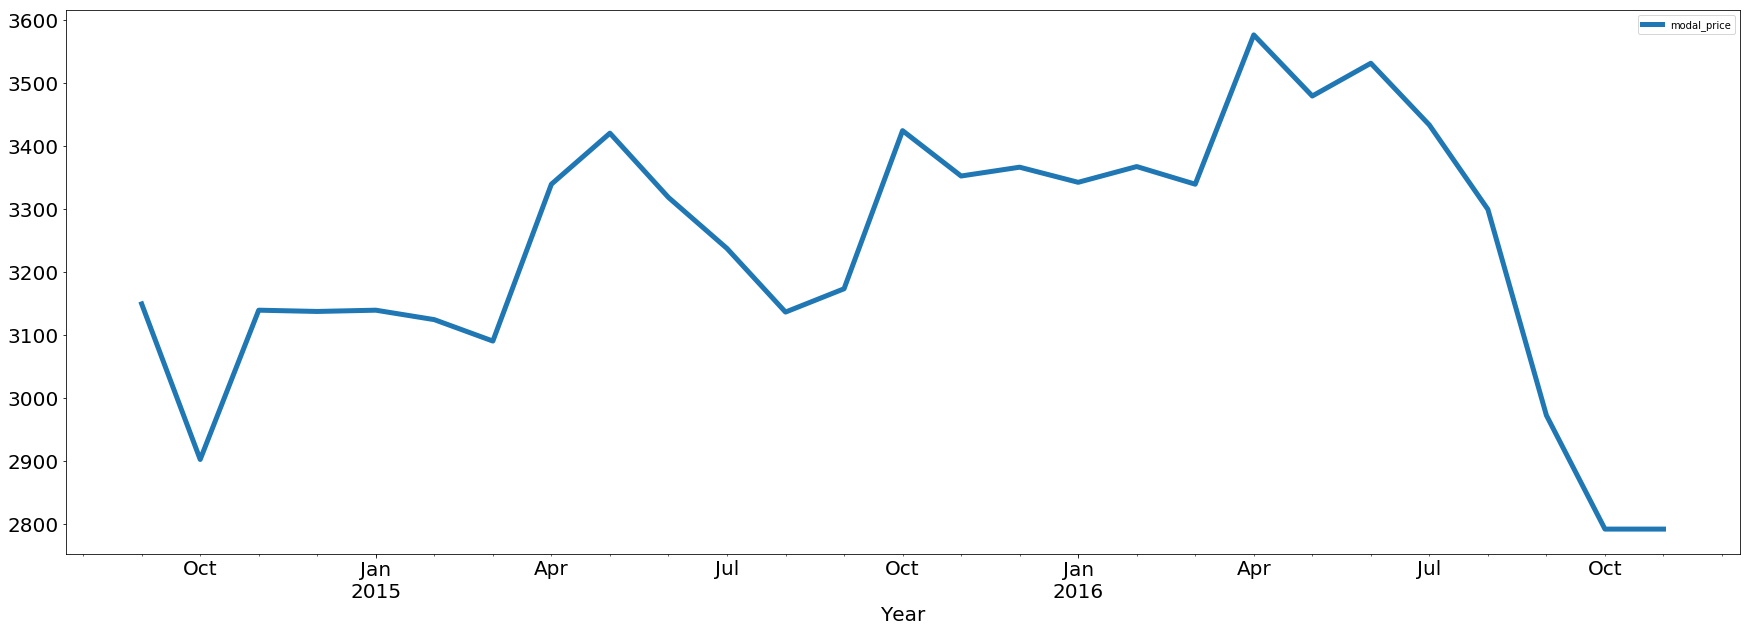

In [40]:
# plotting varaition of modal price year wise for Akole
data[['modal_price']].plot(figsize=(30,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Text(0.5,0,'Year')

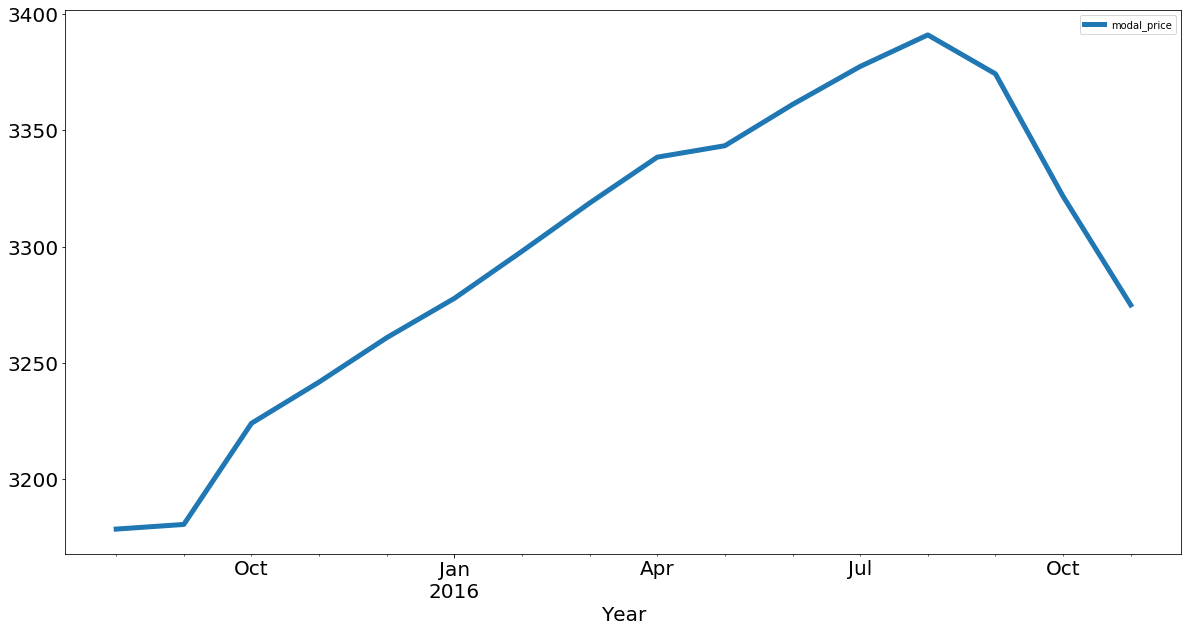

In [41]:
data[['modal_price']].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

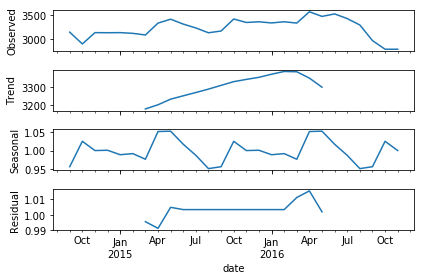

In [42]:
decomposition=sm(data[['modal_price']],model='multiplicative',freq=12)
fig=decomposition.plot()

# Checking seasonality for all commodities

In [47]:
def check_seasonality_type(data_filter):
    
    data_filter["trend"]=data_filter["modal_price"].rolling(window=2).mean()

    data_filter["additive"]=data_filter["modal_price"]-data_filter["trend"]
    data_filter["multiplicative"]=data_filter["modal_price"]/data_filter["trend"]

    additive_mean=data_filter[["additive","quarter"]].groupby(["quarter"]).mean().to_dict()["additive"]
    multiplicative_mean=data_filter[["multiplicative","quarter"]].groupby(["quarter"]).mean().to_dict()["multiplicative"]

    data_filter["seasonal_additive"]=data_filter["quarter"].apply(lambda x: additive_mean[x])
    data_filter["seasonal_multiplicative"]=data_filter["quarter"].apply(lambda x: multiplicative_mean[x])

    data_filter["residual_additive"]=data_filter["additive"]-data_filter["seasonal_additive"]
    data_filter["residual_multiplicative"]=data_filter["multiplicative"]-data_filter["seasonal_multiplicative"]

    additive_acf=sum(np.asarray(acf(data_filter["residual_additive"], missing='drop'))*2)
    multiplicative_acf=sum(np.asarray(acf(data_filter["residual_multiplicative"], missing='drop'))*2)

    if additive_acf<multiplicative_acf:
        return "Additive"
    else:
        return "Multiplicative"

In [48]:
df=pd.read_csv("C:\\Users\\vj0805\\Desktop\\Socialcops\\seasonal_data_analysis.csv")
df["date"]=pd.to_datetime(df["date"])
df.shape

(25209, 13)

In [49]:
commodities=list(df["identifier"].unique())
seasonality_type=[]

# commodity here stands for combination of APMC and commodity
for commodity in commodities:
    data_filter=df[df["identifier"]==commodity]
    seasonality_type.append((commodity,check_seasonality_type(data_filter)))

C:\Users\vj0805\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vj0805\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\vj0805\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [50]:
dataframe=pd.DataFrame(seasonality_type,columns=["Commodity","Seasonality Type"])
dataframe.to_csv("C:\\Users\\vj0805\\Desktop\\Socialcops\\seasonality_type.csv",index=False)